# Data Visualization

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
speciesDict = {0: 'setosa', 1:'versicolor', 2:'virginica'}
df.loc[:,'target'] = df.loc[:, 'target'].apply(lambda x: speciesDict[x])
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
              columns = ['principal component 1', 'principal component 2'])

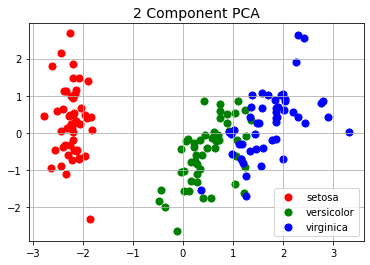

In [5]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4));
targets = df.loc[:, 'target'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)

ax.set_title('2 Component PCA', fontsize = 14)    
ax.legend(targets)
ax.grid()

In [6]:
df = pd.read_csv('data/E.csv')
pixel_colnames = df.columns[:-1]

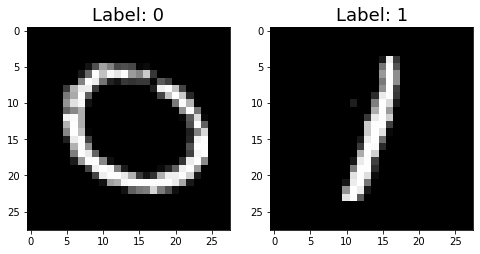

In [7]:
image_values = df.loc[0, pixel_colnames].values
plt.figure(figsize=(8,4))
for index in range(0, 2):
    plt.subplot(1, 2, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap ='gray')
    plt.title('Label: ' + str(image_label), fontsize = 18)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
scaledTrainImages = x_train.copy()

In [9]:
pca = PCA(n_components=0.9)
pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

reg = LogisticRegression()
reg.fit(x_train, y_train)

print('Number of dimensions before PCA: ' + str(len(pixel_colnames)))
print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(reg.score(x_test, y_test)*100))

Number of dimensions before PCA: 784
Number of dimensions after PCA: 104
Classification accuracy: 99.7


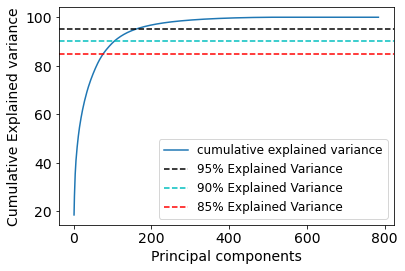

In [10]:
pca = PCA()
pca.fit(scaledTrainImages)
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4));
ax.tick_params(labelsize = 14)
ax.plot(range(1, 785), cum_var_exp, label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 14)
ax.set_xlabel('Principal components', fontsize = 14)

ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['label'], random_state=0)

# Scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# PCA
pca = PCA(n_components=0.9, random_state=0)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# Logistic Regression
reg = LogisticRegression()
reg.fit(x_train, y_train)

print(f'Without Pipeline: {reg.score(x_test, y_test)*100}')

# Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=0.9, random_state=0)),
                 ('logistic', LogisticRegression())])

pipe.fit(x_train, y_train)
print(f'Using Pipeline: {pipe.score(x_test, y_test)*100}')
set_config(display='diagram')
pipe

Without Pipeline: 99.7
Using Pipeline: 99.8


Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, random_state=0)),
                ('logistic', LogisticRegression())])